<a href="https://colab.research.google.com/github/tynguyen/ML_ipython_worksheets/blob/main/week2_worksheet2_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIS 519 
##Week 2, Worksheet 2
# **Decision Tree**
**Goal** : Getting familiar with using built-in decision trees from Scikit-learn . 

Content Creator: Ty Nguyen \\
Content Reviewers:  Halley Young, Kyle Vedder

In [ ]:
# Install packages
!python -m pip install panda
!python -m pip install numpy 
!python -m pip install scikit-learn

  Created wheel for panda: filename=panda-0.3.1-cp27-none-any.whl size=7259 sha256=01f3df89ee69e94d82c0be1d432ffaeaa3c9b15e32fcc75b0275c36047e4a9be
  Stored in directory: /root/.cache/pip/wheels/c6/c8/45/06ed898b0bb401c1ff207dbb05b1587ff28860a236d98b1996
Successfully built panda


In [2]:
# Imports 
import numpy as np
import os

# Simple Training

In [3]:
# Load data
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DT_classifier

# Use IRIS dataset that can be loaded using load_iris
iris_data = load_iris()
# Investigate data
dir(iris_data) # see built-in functions 
iris_np_data = iris_data['data'] # np.ndarray N x 4 (N instances, 4 columns)
iris_target  = iris_data['target'] # Y - classes for each instance (N,)
iris_feature_names = iris_data['feature_names'] # (4,)
iris_target_names  = iris_data['target_names'] # (3,)

In [4]:
iris_target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_np_data.shape

(150, 4)

In [ ]:
dir(iris_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [13]:
# Split data
from sklearn.model_selection import train_test_split
# Select only last two features from the given features. Compare with using all features? 
X = iris_np_data[:, 2:] # N x 2 
y = iris_target # N, 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Create a decision tree
tree_clf = DT_classifier(max_depth=2, criterion='entropy', random_state=0) 
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Training Accuracy

In [16]:
# Prediction on the training set 
y_pred = tree_clf.predict(X_train)
y_pred

array([0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 0, 2, 1, 1])

In [17]:
# Compare with the ground truth 
y_train

array([0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 1, 2, 1, 0, 2, 1, 1])

In [18]:
# Get Accuracy
accuracy = np.sum(y_pred == y_train)/float(len(y_train))
accuracy

0.975

# Validation (test)

In [ ]:
# Prediction on the test set 
y_pred = tree_clf.predict(X_test)
y_pred

array([0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 2])

In [ ]:
# Compare with the ground truth 
y_test

array([1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       1, 1, 2, 2, 0, 1, 1, 1])

In [ ]:
# Get Accuracy
accuracy = np.sum(y_pred == y_test)/float(len(y_test))
accuracy

0.9333333333333333

In [ ]:
# To get a better understanding of our dataset, we can look at the probabilities with which our decision tree classifier is expected to assign a given data point to each of the three different classes of flowers.
y_logits = tree_clf.predict_proba(X_test)
y_logits[:3] # show only 3 instances 

array([[1.   , 0.   , 0.   ],
       [0.   , 0.025, 0.975],
       [1.   , 0.   , 0.   ]])

# Visualization

In [ ]:
# First, we will mount a Google Drive locally to this colab
# Let say we want to read and save files i.e. "test_colab.txt" from this google drive directory,https://drive.google.com/drive/my-drive/CIS519/figures/test_colab.txt
# Run the following lines and follow the printed instructions
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# After mounting, we can just extend '/content/drive/' with the remaining substring in the google drive directory of the file
file_dir = '/content/drive/My Drive/CIS519/figures/test_colab.txt'
with open(file_dir, 'r') as f:
  line = f.readline()
  print(line)

read this file from google drive



In [ ]:
# visualize the tree 
from sklearn.tree import export_graphviz

# Save the visualization of the trained tree to this colab's local
tree_viz_dot_file = 'iris_tree_2feats.dot'
export_graphviz(tree_clf,
                out_file =tree_viz_dot_file,
                feature_names = iris_feature_names[2:],
                class_names= iris_target_names,
                rounded=True,
                filled=True)
# Save this visualization to a png file and download to the local machine
!dot -Tpng iris_tree_2feats.dot -o iris_tree_2feats.png 

from google.colab import files
files.download(tree_viz_png_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

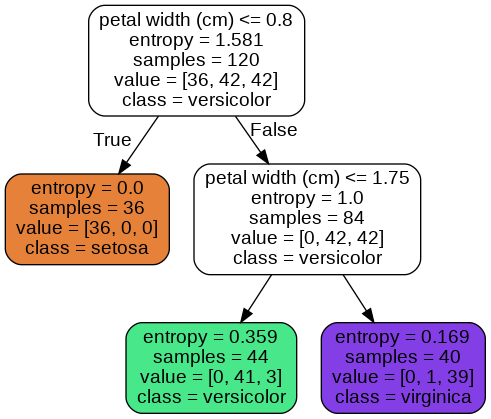

In [ ]:
# The tree will look like this
from PIL import Image
Image.open('iris_tree_2feats.png')

Saving figure decision_tree_boundries_plot


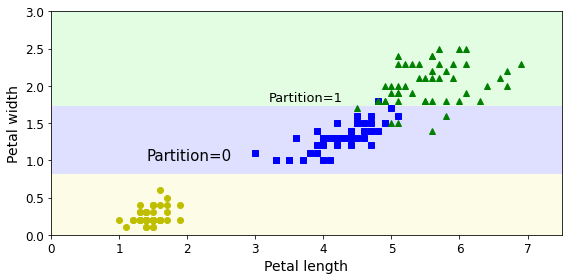

In [ ]:
# Visualize boundaries
from matplotlib.colors import ListedColormap
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Let say we will save our figures to a google drive directory. Make sure that this google drive has been mounted to the colab
FIG_ROOT = '/content/drive/My Drive/CIS519/figures/'

def image_path(fig_id):
    return os.path.join(FIG_ROOT, fig_id)

def save_fig(fig_id, tight_layout=True, is_download=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    img_file = image_path(fig_id) + ".png"
    plt.savefig(img_file, format='png', dpi=300)
    # We can also save this saved file to our local machine 
    if is_download:
      from google.colab import files
      files.download(img_file)
      print(f">> Successfully download file {img_file} to the local machine!")
 
 
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
# Plot texts that represent the partitions. Values used to draw these lines are taken from the tree visualization (threshold values)
plt.text(1.40, 1.0, "Partition=0", fontsize=15)
plt.text(3.2, 1.80, "Partition=1", fontsize=13)
 
save_fig("decision_tree_boundries_plot", is_download=False) # Do not download locally
plt.show()

> From the above plot, consider the following questions:

> What trend(s) are observed in the data with regards to petal length?
Is petal length a good attribute to use for distinguishing different flowers? Why or why not?

Other bonues: how's about using more features? adding noise to data to see if it's robust? prunning ? 


# Experimenting the Depth of a Decision Tree
In this section, we will combine all together and experiment the (maximum) depth of a decision tree on a new dataset

## Credits to https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb